In [1]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import datetime
import re, nltk, spacy

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim.models import CoherenceModel

# LDA plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
pd.options.mode.chained_assignment = None 

[nltk_data] Downloading package wordnet to /Users/xuetong/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
class databaseInteracter():
    def __init__(self,host,port,database,user,password):
        self.host=host
        self.port=port
        self.database=database
        self.user=user
        self.password=password
        
    def get_data(self,query,col_name):
        '''retrive data from database and truned it into pandas dataframe'''
        try:
            conn=psycopg2.connect(host=self.host,port=self.port,database=self.database,
                                  user=self.user,password=self.password)
            print('Successfully connected to database')
            cursor=conn.cursor()
            cursor.execute(query)
            data=cursor.fetchall()
            print('data retrived')
            df=pd.DataFrame(data,columns=col_name)
            return df
        except (Exception, psycopg2.DatabaseError) as error:
            print(error)


In [4]:
interacter=databaseInteracter(host='localhost',port='5432',database='mydb',user='user1',password='user1123')

playlist_df=interacter.get_data(query='''SELECT  video_title,video_description,channel_id,channel_title,pulishedAt,
                                position,video_id FROM playlist_video''',
                       
                       col_name=['video_title','video_description','channel_id','channel_title','pulishedAt',
                                'position','video_id']
                      )

Successfully connected to database
data retrived


In [5]:
playlist_df['publishedAt']=playlist_df['pulishedAt'].apply(lambda x: pd.to_datetime(x))

playlist_df['date']=playlist_df['publishedAt'].apply(lambda x: x.date())

df=playlist_df[playlist_df['date']>=datetime.date(2019,1,1)]

In [6]:
df.head(10)

,video_title,video_description,channel_id,channel_title,pulishedAt,position,video_id,publishedAt,date
0,How to Spot a Superfake Louis Vuitton Ft. LV C...,Note: Louis Vuitton items in this video have b...,UCbbtaznOJyg9o8FJgP-HYSg,Escala Manila,2019-02-23T14:08:49.000Z,0.0,rV4y0wYRNmc,2019-02-23 14:08:49,2019-02-23
1,How to Spot a fake Chanel - Chanel Le Boy Supe...,Disclaimer: Escala Manila is an independent re...,UCbbtaznOJyg9o8FJgP-HYSg,Escala Manila,2019-02-15T05:06:44.000Z,1.0,BiGapz44Odg,2019-02-15 05:06:44,2019-02-15
2,Louis Vuitton Neo Noe - Real or Fake? Authenti...,EDIT: After chatting with Entrupy the double a...,UCbbtaznOJyg9o8FJgP-HYSg,Escala Manila,2019-02-07T12:00:08.000Z,2.0,oitn0VCT-Kw,2019-02-07 12:00:08,2019-02-07
3,Marc Jacob Snapshot and Marc Jacob Softshot 21...,Once in awhile I really like to dress up my lo...,UCbbtaznOJyg9o8FJgP-HYSg,Escala Manila,2019-01-29T05:18:43.000Z,3.0,p5c5VsfxvWE,2019-01-29 05:18:43,2019-01-29
4,Best Value for Money & Cheapest Louis Vuitton ...,"Having a piece of luxury in your wardrobe, eve...",UCbbtaznOJyg9o8FJgP-HYSg,Escala Manila,2019-01-24T05:00:57.000Z,4.0,9SvXhy9PrSQ,2019-01-24 05:00:57,2019-01-24
5,Kate Spade Crossbody Bags Compilation! Try on ...,"I've always enjoyed Kate Spade's fun, quirky a...",UCbbtaznOJyg9o8FJgP-HYSg,Escala Manila,2019-01-17T11:00:09.000Z,5.0,kqndSmDSBq8,2019-01-17 11:00:09,2019-01-17
6,Best Crossbody Travel Bag! Loewe Puzzle Bag 20...,If you're thinking of doing a lot of traveling...,UCbbtaznOJyg9o8FJgP-HYSg,Escala Manila,2019-01-10T16:38:33.000Z,6.0,8rM_6MWgQ8Q,2019-01-10 16:38:33,2019-01-10
7,Chanel 19C Tiffany Blue Classic Flap - First I...,Starting the New Year right with this beautifu...,UCbbtaznOJyg9o8FJgP-HYSg,Escala Manila,2019-01-04T13:55:53.000Z,7.0,gXBdu8ZthhY,2019-01-04 13:55:53,2019-01-04
41,Morning Skin care Routine using Affordable pro...,Hello lovely people of the internet ! íÁôÖ...,UCRIfnlDXe4pJ10Ld3oKhgnw,divya chandron,2019-02-24T05:18:44.000Z,0.0,fXHdUT7AShU,2019-02-24 05:18:44,2019-02-24
42,I TRIED TO RE-CREATE KYLIE JENNER'S VALENTINE'...,HI GUYS! VALENTINE'S DAY IS RIGHT AROUND THE ...,UCRIfnlDXe4pJ10Ld3oKhgnw,divya chandron,2019-02-12T18:42:15.000Z,1.0,jqzWeTGzMZ0,2019-02-12 18:42:15,2019-02-12


In [8]:
playlist_df['publishedAt']=playlist_df['pulishedAt'].apply(lambda x: pd.to_datetime(x))
playlist_df['date']=playlist_df['publishedAt'].apply(lambda x: x.date())
df=playlist_df[playlist_df['date']>=datetime.date(2019,1,1)]
print("dataframe dimension: "+str(df.shape))
print("datafrmae columns: "+str(df.columns))

dataframe dimension: (24072, 9)
datafrmae columns: Index(['video_title', 'video_description', 'channel_id', 'channel_title',
       'pulishedAt', 'position', 'video_id', 'publishedAt', 'date'],
      dtype='object')


## Data cleaning and preprocessing

In [9]:
#replace all line change and tap 
df['video_description']=df['video_description'].apply(lambda x: str(x).replace('\r', ' ').replace('\n', ' ').replace('\t',' ').replace('\s+',' '))
#extract ulr delete it from descriptions
df['urls']=df['video_description'].apply(lambda x: re.findall('(?:(?:https?|ftp):\/\/)?[\w/\-?=%.]+\.[\w/\-?=%.]+', x))
df['video_description']=df['video_description'].apply(lambda x: re.sub('(?:(?:https?|ftp):\/\/)?[\w/\-?=%.]+\.[\w/\-?=%.]+',' ',x))
##clean text
df['video_description']=df['video_description'].apply(lambda x: re.sub('[^A-Za-z0-9&_-]',' ',x))
df['video_title']=df['video_title'].apply(lambda x: re.sub('[^A-Za-z0-9&_-]',' ',x))
##tokenizing text
df['title_token']= df['video_title'].apply(lambda x:gensim.utils.simple_preprocess(str(x), deacc=False))
df['description_token']=df['video_description'].apply(lambda x:gensim.utils.simple_preprocess(str(x), deacc=False))
text_token=list(df['title_token']+df['description_token'])


In [10]:
##creating bigram
bigram = gensim.models.Phrases(text_token, min_count=5, threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)

In [11]:
stop_words = stopwords.words('english')
stop_words.extend(['video', 'videos', 'use','para'])

In [12]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words and len(word)>2] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [13]:
text_nostops = remove_stopwords(text_token)
text_bigrams = make_bigrams(text_nostops)
nlp = spacy.load('en', disable=['parser', 'ner'])
text_lemmatized = lemmatization(text_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(text_bigrams[:1])

[['spot', 'superfake', 'louis_vuitton', 'canvas', 'tote', 'updated', 'note', 'louis_vuitton', 'items', 'authenticated', 'using', 'entrupy', 'bag', 'tagged', 'unidentified', 'fake', 'inconsistent', 'known', 'authentic', 'louis_vuitton', 'items', 'microscopic', 'level', 'spot', 'difference', 'fake', 'authentic', 'louis_vuitton', 'used', 'quite', 'easy', 'tell', 'quickly', 'bag', 'authentic', 'manufacturing', 'technology', 'improves', 'super', 'fakes', 'dissect', 'louis_vuitton', 'canvas', 'tote', 'size', 'inclusions', 'bag', 'receipts', 'bag', 'order', 'determine', 'authenticity', 'still', 'believe', 'best', 'way', 'know', 'real', 'fake', 'able', 'compare', 'bag', 'authentic', 'one', 'boutique', 'cases', 'possible', 'best', 'prudent', 'enough', 'educate', 'real', 'one', 'look', 'like', 'fake', 'ones', 'also', 'look', 'although', 'fakes', 'come', 'different', 'manufacturers', 'different', 'qualities', 'hope', 'enjoyed', 'louis_vuitton', 'superfakes', 'make', 'sure', 'subscribe', 'new', 'l

## LDA Model 

In [14]:
dictionary = gensim.corpora.Dictionary(text_lemmatized)
bow_corpus = [dictionary.doc2bow(doc) for doc in text_lemmatized]

In [15]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print('Calculating {}-topic model'.format(num_topics))
        model=gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics,random_state=100,alpha='auto')
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

#corpus=bow_corpus,id2word=dictionary

In [18]:
limit=25; start=2; step=1;
model_list1, coherence_values1 = compute_coherence_values(dictionary=dictionary,
                                                        corpus=bow_corpus,
                                                        texts=text_lemmatized,
                                                        start=start,
                                                        limit=limit,
                                                        step=step)

Calculating 2-topic model
Calculating 3-topic model
Calculating 4-topic model
Calculating 5-topic model
Calculating 6-topic model
Calculating 7-topic model
Calculating 8-topic model
Calculating 9-topic model
Calculating 10-topic model
Calculating 11-topic model
Calculating 12-topic model
Calculating 13-topic model
Calculating 14-topic model
Calculating 15-topic model
Calculating 16-topic model
Calculating 17-topic model
Calculating 18-topic model
Calculating 19-topic model
Calculating 20-topic model
Calculating 21-topic model
Calculating 22-topic model
Calculating 23-topic model
Calculating 24-topic model


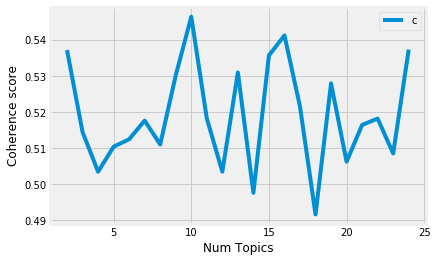

In [19]:
x1 = range(start, limit, step)
plt.plot(x1, coherence_values1)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [20]:
# lda_model = gensim.models.ldamodel.LdaModel(corpus=bow_corpus,id2word=dictionary,
#                                            num_topics=7, 
#                                            random_state=100,
#                                            update_every=1,
#                                            chunksize=100,
#                                            passes=10,
#                                            alpha='auto',
#                                            per_word_topics=True)

In [30]:
best_model=model_list1[8]

In [31]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(best_model, bow_corpus, dictionary)
pyLDAvis.display(vis)

In [32]:
# Compute Perplexity
print ('Perplexity: ', best_model.log_perplexity(bow_corpus))
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=best_model, texts=text_lemmatized, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print ('Coherence Score: ', coherence_lda)

Perplexity:  -8.389424549267614
Coherence Score:  0.546490227559248


## dominant topic in each document

In [34]:
def format_topics_sentences(ldamodel, corpus, texts):
    sent_topics_df = pd.DataFrame()

    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    sent_topics_df.columns =['Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
    return(sent_topics_df)
dominant_topic_df=format_topics_sentences(best_model,corpus=bow_corpus,texts=text_lemmatized)
dominant_topic_df.head()


,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,4.0,0.4933,"bag, diy, louis_vuitton, unbox, collection, ch...","[spot, superfake, louis_vuitton, canvas, tote,..."
1,4.0,0.5407,"bag, diy, louis_vuitton, unbox, collection, ch...","[spot_fake, chanel, chanel, boy, super, fake, ..."
2,4.0,0.3149,"bag, diy, louis_vuitton, unbox, collection, ch...","[louis_vuitton, neo_noe, real, fake, authentic..."
3,4.0,0.2546,"bag, diy, louis_vuitton, unbox, collection, ch...","[marc_jacob, snapshot, marc_jacob, softshot, r..."
4,3.0,0.3492,"instagram, subscribe, get, channel, love, new,...","[good, value, money, cheap, louis_vuitton, ite..."


## The Most Representative Document For each topic

In [37]:
# Group top 5 sentences under each topic
sent_topics_df = pd.DataFrame()

sent_topics_grpd = dominant_topic_df.groupby('Dominant_Topic')

for i, grp in sent_topics_grpd:
    sent_topics_df = pd.concat([sent_topics_df, grp.sort_values(['Topic_Perc_Contrib'], ascending=[0]).head(1)],axis=0)    
sent_topics_df.reset_index(drop=True, inplace=True)
sent_topics_df.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]
sent_topics_df.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.9934,"link, haul, review, product, shop, price, chea...","[wed, lehenga, review, unbox, lehenga, online,..."
1,1.0,0.9917,"hair, makeup, product, brush, beauty, foundati...","[full, face, use, brand, affordable, makeup, t..."
2,2.0,0.9934,"vlog, music, instagram, life, day, twitter, ge...","[bad, experience, eating_disorder, clinic, try..."
3,3.0,0.9930,"instagram, subscribe, get, channel, love, new,...","[know, sabre, good, norris_nuts, part, get, kn..."
4,4.0,0.9763,"bag, diy, louis_vuitton, unbox, collection, ch...","[pitha_recipe, bengali, sweet, patisapta, pith..."


## Topic distribution across documents

In [40]:
topic_counts = dominant_topic_df['Dominant_Topic'].value_counts()
topic_contribution = round(topic_counts/topic_counts.sum(), 4)
topic_num_keywords = dominant_topic_df[['Dominant_Topic', 'Keywords']]
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']
df_dominant_topics.head()

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0,4.0,"bag, diy, louis_vuitton, unbox, collection, ch...",1969.0,0.0818
1,4.0,"bag, diy, louis_vuitton, unbox, collection, ch...",1997.0,0.0830
2,4.0,"bag, diy, louis_vuitton, unbox, collection, ch...",3709.0,0.1541
3,4.0,"bag, diy, louis_vuitton, unbox, collection, ch...",7860.0,0.3265
4,3.0,"instagram, subscribe, get, channel, love, new,...",1194.0,0.0496
